Validar la versión de "Qiskit"

In [1]:
from qiskit import __version__
print(__version__)

1.3.2


Se utilizara la biblioteca "numpy" para trabajar con Vectores y Matrices

In [3]:
import numpy as np

ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

print(ket0)
print(ket1)
print(ket0/2 + ket1/2)    # Suma de vectores y producto de escalar 1/2


[[1]
 [0]]
[[0]
 [1]]
[[0.5]
 [0.5]]


In [5]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2     # Suma de Matrices y producto de escalar 1/2
print(M)

[[1.  0.5]
 [0.  0.5]]


La multiplicacion de matrices y/o vectores se haran con la función "matmul" de "numpy"

In [6]:
print("Matriz por vector \n", np.matmul(M1, ket1))
print("Matriz por matriz \n", np.matmul(M1, M2))
print("Matriz al cuadrado \n", np.matmul(M, M))

Matriz por vector 
 [[1]
 [0]]
Matriz por matriz 
 [[1 1]
 [0 0]]
Matriz al cuadrado 
 [[1.   0.75]
 [0.   0.25]]


Una mejor visualización de una matriz con una función de "Qiskit"

In [9]:
from qiskit.visualization import array_to_latex

display("Matriz por vector", array_to_latex(np.matmul(M1, ket1)))
display("Matriz por matriz", array_to_latex(np.matmul(M1 , M2)))
display("Matriz al cuadrado", array_to_latex(np.matmul(M, M)))

'Matriz por vector'

<IPython.core.display.Latex object>

'Matriz por matriz'

<IPython.core.display.Latex object>

'Matriz al cuadrado'

<IPython.core.display.Latex object>

Vector de Estado de Qiskit

In [20]:
from qiskit.quantum_info import Statevector

u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

display(v.draw("text"))
display(v.draw("latex"))
print(v.draw("latex_source"))

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

(\frac{1}{3} + \frac{2 i}{3}) |0\rangle- \frac{2}{3} |1\rangle


In [14]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

Mediciones de base estandar con el metodo "measure" que devuelve el estado de la medición y el nuevo Vector de Estado cuántico después de la medición. Además se usa el prefijo "f" para incrustar código en Print.

In [21]:
outcome, state = v.measure()

print(f"Medición: {outcome}\nEstado posterior a la medición")
display(state.draw("latex"))

Medición: 0
Estado posterior a la medición


<IPython.core.display.Latex object>

Recuentos de Muestas con el metodo "sample_counts"

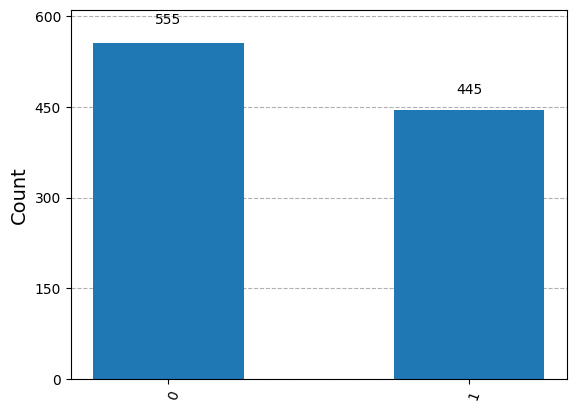

In [47]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

Operaciones Unitarias con el metodo "Operator" de Qiskit, y este metodo tambien tiene una clase llamada "draw"

In [56]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1+1.0j)/np.sqrt(2)]])

print("Para la matriz Y:"); display(Y.draw("latex"))
print("Para la matriz H:"); display(H.draw("latex"))
print("Para la matriz S:"); display(S.draw("latex"))
print("Para la matriz T:"); display(T.draw("latex"))

Para la matriz Y:


<IPython.core.display.Latex object>

Para la matriz H:


<IPython.core.display.Latex object>

Para la matriz S:


<IPython.core.display.Latex object>

Para la matriz T:


<IPython.core.display.Latex object>

Aplicar una Operación Unitaria a un Vector con el método "evolve"

In [57]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

Ejemplo de un Circuito Cuantico con el metodo "QuantumCircuit" de Qiskit, a travez de una composición de operaciones unitarios con un Qubit

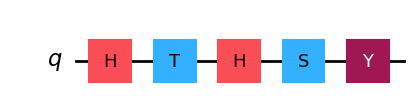

In [58]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))


Obteniendo la matriz unitaria con el metodo "Operator" y su clase "from_cicuit"

In [59]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

Evolucionando a travez de secuencia de operaciones desde un vector de estado inicial

In [60]:
ket = Statevector([1, 0])
vv = ket.evolve(circuit)
display(vv.draw("latex"))

<IPython.core.display.Latex object>

Simulación de mediciones experimentales del circuito anterior con una base de 4,000 copias nuevas de estados

La relación de 0 ( 595 ) sobre 1 ( 3405 ), es:  17.47 %


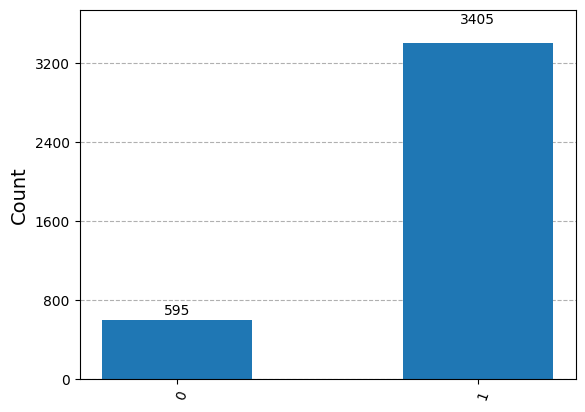

In [91]:
stat = vv.sample_counts(4000)

print("La relación de 0 (",stat["0"],") sobre 1 (",stat["1"],"), es: ",round(stat["0"]/stat["1"]*100, 2),"%")
display(plot_histogram(stat))